# Heart Disease Prediction Using Model Evaluation & Cross-Validation

## Problem Definition

This project develops binary classification models to predict heart disease using medical indicators such as age, cholesterol, resting blood pressure, and chest pain type. We'll train and compare logistic regression and decision tree models, evaluate them using multiple metrics, and validate results with k-fold cross-validation.

## Objectives:
- Load and analyze the UCI Heart Disease Dataset
- Perform comprehensive EDA and preprocessing
- Train logistic regression and decision tree classifiers
- Evaluate models using accuracy, precision, recall, F1-score, and ROC-AUC
- Apply k-fold cross-validation for robust performance assessment
- Compare models and select the best approach based on statistical and clinical interpretability

---

## 1. Setup and Data Loading

In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve)
from sklearn.preprocessing import LabelEncoder, StandardScaler
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Set plotting style
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")

All libraries imported successfully!


In [5]:
# Load the UCI Heart Disease Dataset
print("Loading UCI Heart Disease Dataset...")

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Extract features and target
X = heart_disease.data.features
y = heart_disease.data.targets

print(f"Dataset loaded successfully!")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Display metadata
print("\n" + "="*50)
print("DATASET METADATA")
print("="*50)
print(heart_disease.metadata)

print("\n" + "="*50)
print("VARIABLE INFORMATION")
print("="*50)
print(heart_disease.variables)

Loading UCI Heart Disease Dataset...
Dataset loaded successfully!
Features shape: (303, 13)
Target shape: (303, 1)

DATASET METADATA
{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International applicati

## 2. Exploratory Data Analysis (EDA)

In [6]:
# Basic dataset information
print("="*60)
print("DATASET OVERVIEW")
print("="*60)

print(f"Dataset Shape: {X.shape}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of samples: {X.shape[0]}")

print("\nFeature Names:")
print(X.columns.tolist())

print("\nTarget Variable:")
print(y.columns.tolist())

print("\nData Types - Features:")
print(X.dtypes)

print("\nData Types - Target:")
print(y.dtypes)

print("\nFirst few rows - Features:")
X.head()

DATASET OVERVIEW
Dataset Shape: (303, 13)
Number of features: 13
Number of samples: 303

Feature Names:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

Target Variable:
['num']

Data Types - Features:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object

Data Types - Target:
num    int64
dtype: object

First few rows - Features:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0


TARGET VARIABLE ANALYSIS
Target variable distribution:
num
0      164
1       55
2       36
3       35
4       13
Name: count, dtype: int64

Target variable proportions:
num
0      0.541254
1      0.181518
2      0.118812
3      0.115512
4      0.042904
Name: proportion, dtype: float64


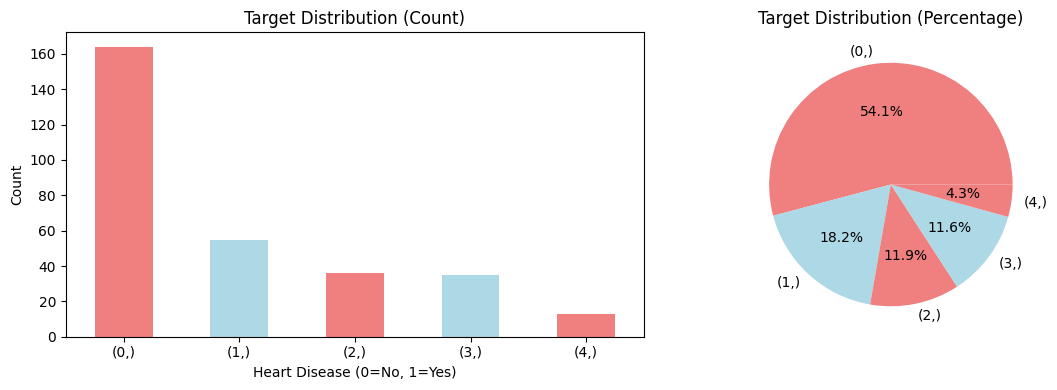

In [7]:
# Target variable analysis
print("="*60)
print("TARGET VARIABLE ANALYSIS")
print("="*60)

print("Target variable distribution:")
print(y.value_counts())

print("\nTarget variable proportions:")
print(y.value_counts(normalize=True))

# Plot target distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
y.value_counts().plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Target Distribution (Count)')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
y.value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
plt.title('Target Distribution (Percentage)')
plt.ylabel('')

plt.tight_layout()
plt.show()

MISSING VALUES ANALYSIS
Missing values in features:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Total missing values in features: 6

Missing values in target:
num    0
dtype: int64
Total missing values in target: 0


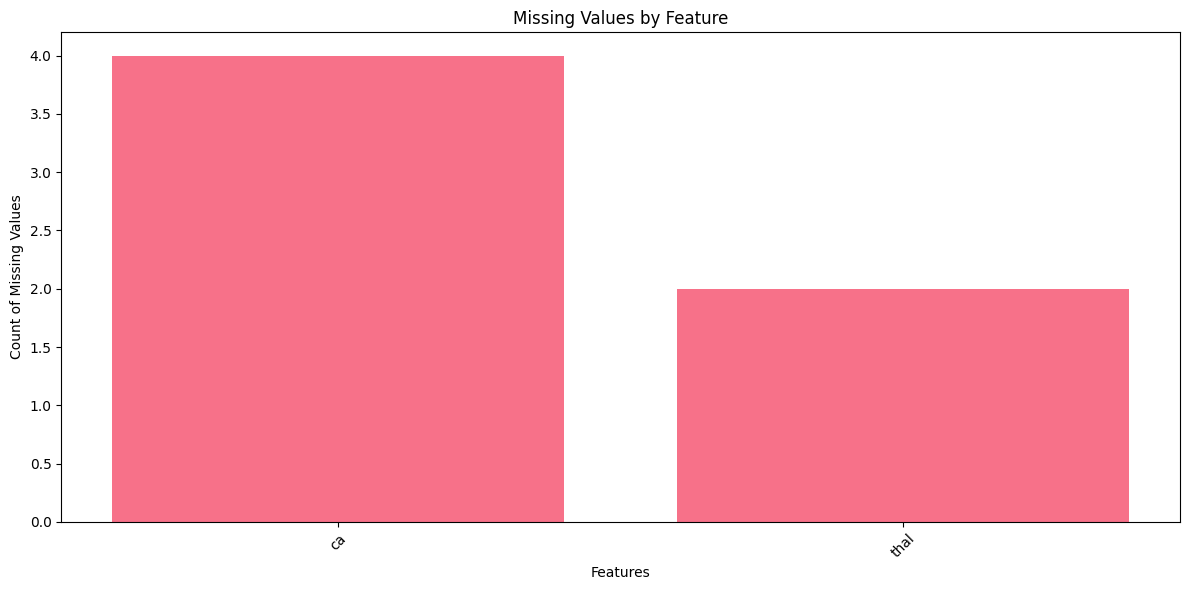

In [8]:
# Missing values analysis
print("="*60)
print("MISSING VALUES ANALYSIS")
print("="*60)

print("Missing values in features:")
missing_features = X.isnull().sum()
print(missing_features)

print(f"\nTotal missing values in features: {missing_features.sum()}")

print("\nMissing values in target:")
missing_target = y.isnull().sum()
print(missing_target)

print(f"Total missing values in target: {missing_target.sum()}")

if missing_features.sum() > 0:
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    missing_data = missing_features[missing_features > 0]
    plt.bar(missing_data.index, missing_data.values)
    plt.title('Missing Values by Feature')
    plt.xlabel('Features')
    plt.ylabel('Count of Missing Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("✅ No missing values found in the dataset!")

In [9]:
# Statistical summary of numerical features
print("="*60)
print("STATISTICAL SUMMARY")
print("="*60)

# Get numerical columns
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"Numerical features ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical features ({len(categorical_cols)}): {categorical_cols}")

print("\nStatistical Summary of Numerical Features:")
X[numerical_cols].describe()

STATISTICAL SUMMARY
Numerical features (13): ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
Categorical features (0): []

Statistical Summary of Numerical Features:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


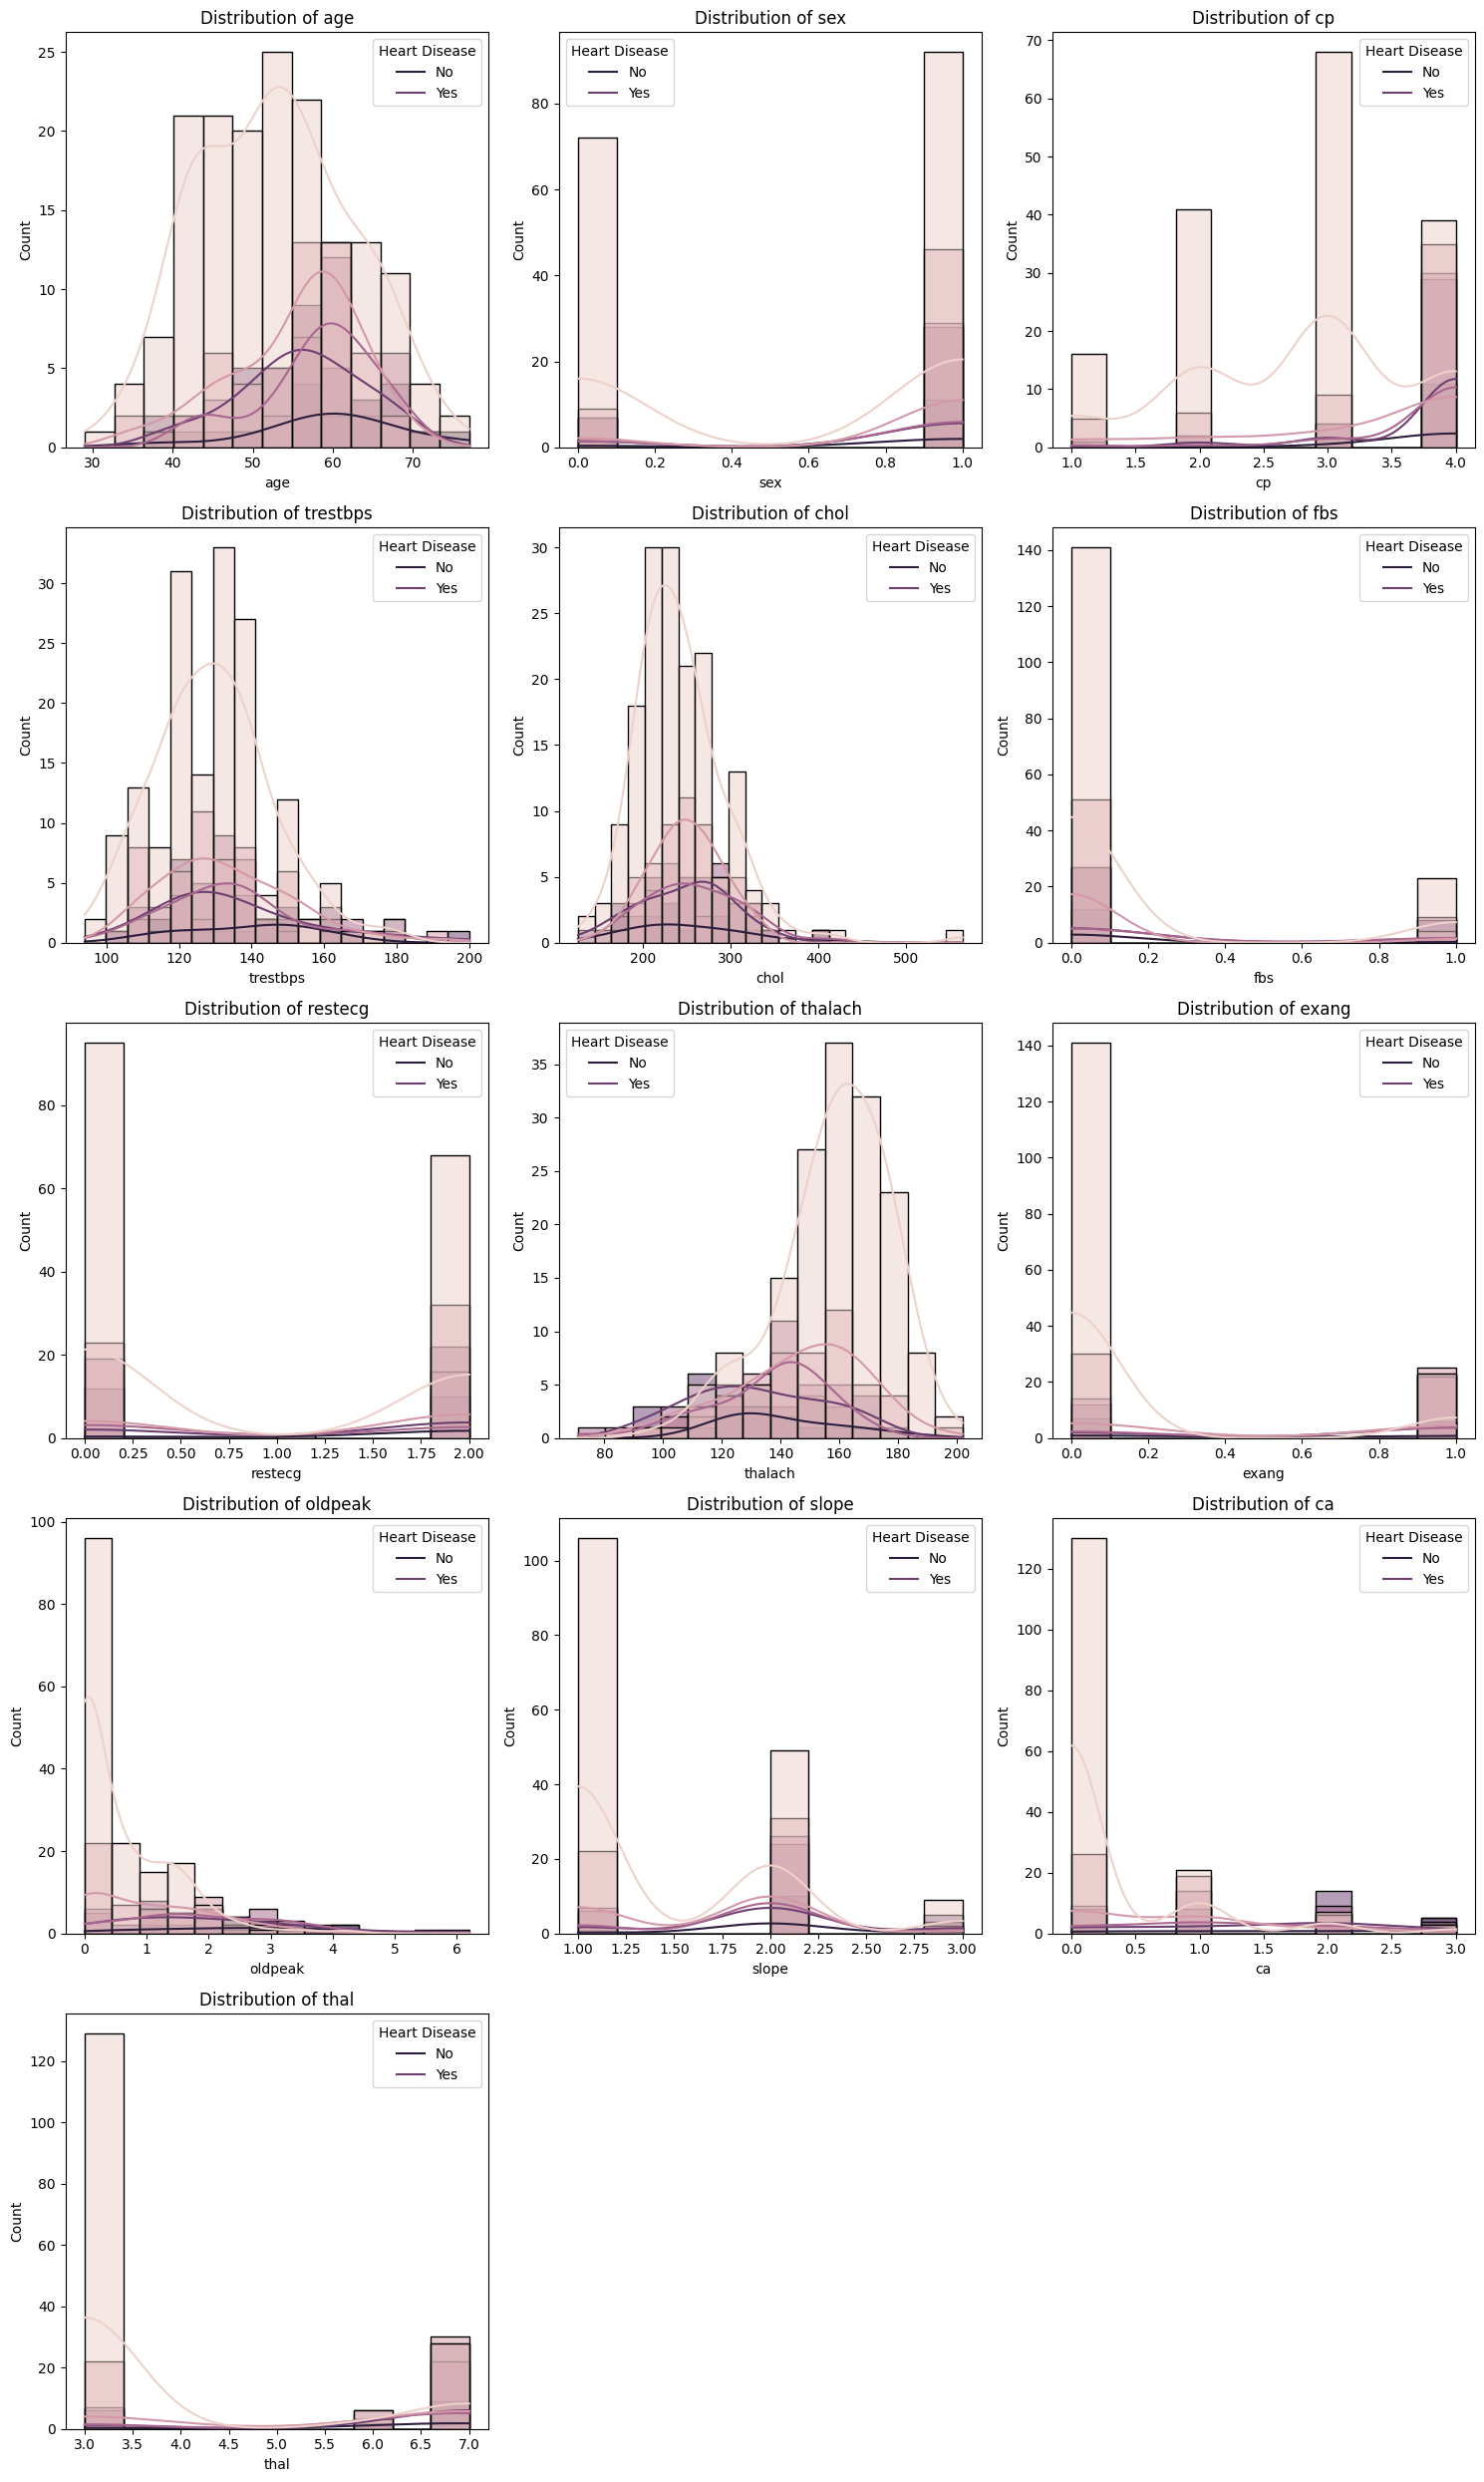

In [10]:
# Visualize distributions of numerical features
if len(numerical_cols) > 0:
    fig, axes = plt.subplots(nrows=(len(numerical_cols)+2)//3, ncols=3, figsize=(15, 5*((len(numerical_cols)+2)//3)))
    axes = axes.flatten() if len(numerical_cols) > 3 else [axes] if len(numerical_cols) == 1 else axes
    
    for i, col in enumerate(numerical_cols):
        sns.histplot(data=X, x=col, hue=y.iloc[:, 0], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].legend(title='Heart Disease', labels=['No', 'Yes'])
    
    # Hide extra subplots
    for j in range(len(numerical_cols), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Visualize categorical features if any
if len(categorical_cols) > 0:
    fig, axes = plt.subplots(nrows=(len(categorical_cols)+2)//3, ncols=3, figsize=(15, 5*((len(categorical_cols)+2)//3)))
    axes = axes.flatten() if len(categorical_cols) > 3 else [axes] if len(categorical_cols) == 1 else axes
    
    for i, col in enumerate(categorical_cols):
        pd.crosstab(X[col], y.iloc[:, 0]).plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].legend(title='Heart Disease', labels=['No', 'Yes'])
        axes[i].tick_params(axis='x', rotation=45)
    
    # Hide extra subplots
    for j in range(len(categorical_cols), len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()

CORRELATION ANALYSIS


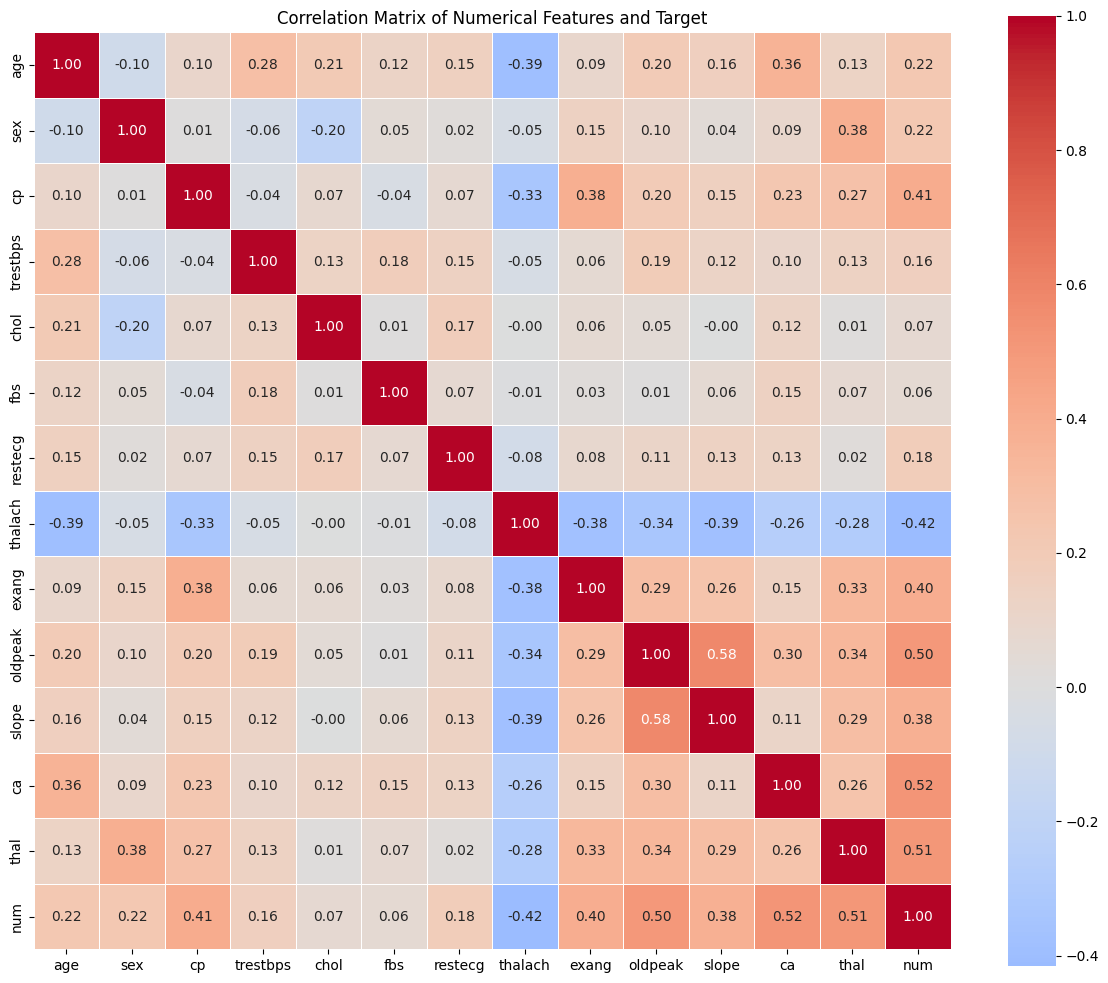


Correlations with Heart Disease (absolute values):
num         1.000000
ca          0.518909
thal        0.509923
oldpeak     0.504092
thalach     0.415040
cp          0.407075
exang       0.397057
slope       0.377957
sex         0.224469
age         0.222853
restecg     0.183696
trestbps    0.157754
chol        0.070909
fbs         0.059186
Name: num, dtype: float64


In [11]:
# Correlation analysis
if len(numerical_cols) > 1:
    print("="*60)
    print("CORRELATION ANALYSIS")
    print("="*60)
    
    # Calculate correlation matrix including target
    correlation_data = pd.concat([X[numerical_cols], y], axis=1)
    corr_matrix = correlation_data.corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5, fmt='.2f')
    plt.title('Correlation Matrix of Numerical Features and Target')
    plt.tight_layout()
    plt.show()
    
    # Show correlations with target variable
    target_corr = corr_matrix.iloc[:, -1].abs().sort_values(ascending=False)
    print("\nCorrelations with Heart Disease (absolute values):")
    print(target_corr)
else:
    print("Insufficient numerical features for correlation analysis")

## 3. Data Preprocessing

In [12]:
# Create copies for preprocessing
X_processed = X.copy()
y_processed = y.copy()

print("="*60)
print("DATA PREPROCESSING")
print("="*60)

# Handle missing values (if any)
if X_processed.isnull().sum().sum() > 0:
    print("Handling missing values...")
    # For numerical columns, use median
    for col in numerical_cols:
        if X_processed[col].isnull().sum() > 0:
            X_processed[col].fillna(X_processed[col].median(), inplace=True)
    
    # For categorical columns, use mode
    for col in categorical_cols:
        if X_processed[col].isnull().sum() > 0:
            X_processed[col].fillna(X_processed[col].mode()[0], inplace=True)
    
    print("Missing values handled!")
else:
    print("✅ No missing values to handle!")

# Encode categorical variables if any
label_encoders = {}
if len(categorical_cols) > 0:
    print(f"\nEncoding categorical variables: {categorical_cols}")
    
    for col in categorical_cols:
        le = LabelEncoder()
        X_processed[col] = le.fit_transform(X_processed[col])
        label_encoders[col] = le
        print(f"  - {col}: {len(le.classes_)} unique values")
    
    print("Categorical encoding completed!")
else:
    print("✅ No categorical variables to encode!")

# Convert target to binary if needed (some datasets have multi-class)
print(f"\nTarget variable before processing: {y_processed.iloc[:, 0].unique()}")

# Convert target to binary (0: no heart disease, 1: heart disease)
y_binary = (y_processed.iloc[:, 0] > 0).astype(int)
print(f"Target variable after processing: {y_binary.unique()}")

print(f"\nFinal dataset shape: {X_processed.shape}")
print(f"Final target shape: {y_binary.shape}")

# Display processed data info
print("\nProcessed features data types:")
print(X_processed.dtypes)
print(f"\nTarget distribution after processing:")
print(y_binary.value_counts())

DATA PREPROCESSING
Handling missing values...
Missing values handled!
✅ No categorical variables to encode!

Target variable before processing: [0 2 1 3 4]
Target variable after processing: [0 1]

Final dataset shape: (303, 13)
Final target shape: (303,)

Processed features data types:
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca          float64
thal        float64
dtype: object

Target distribution after processing:
num
0    164
1    139
Name: count, dtype: int64


## 4. Data Splitting

In [13]:
# Split the data into training and testing sets
print("="*60)
print("DATA SPLITTING")
print("="*60)

# Split data with stratification to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_binary, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_binary
)

print(f"Training set size: {X_train.shape[0]} samples ({X_train.shape[0]/len(X_processed)*100:.1f}%)")
print(f"Testing set size: {X_test.shape[0]} samples ({X_test.shape[0]/len(X_processed)*100:.1f}%)")

print(f"\nTraining set target distribution:")
print(y_train.value_counts())
print(f"Training set proportions:")
print(y_train.value_counts(normalize=True))

print(f"\nTesting set target distribution:")
print(y_test.value_counts())
print(f"Testing set proportions:")
print(y_test.value_counts(normalize=True))

# Feature scaling (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n✅ Data splitting completed successfully!")
print(f"Features have been scaled for logistic regression.")

DATA SPLITTING
Training set size: 242 samples (79.9%)
Testing set size: 61 samples (20.1%)

Training set target distribution:
num
0    131
1    111
Name: count, dtype: int64
Training set proportions:
num
0    0.541322
1    0.458678
Name: proportion, dtype: float64

Testing set target distribution:
num
0    33
1    28
Name: count, dtype: int64
Testing set proportions:
num
0    0.540984
1    0.459016
Name: proportion, dtype: float64

✅ Data splitting completed successfully!
Features have been scaled for logistic regression.


## 5. Model Training - Logistic Regression

In [14]:
# Train Logistic Regression model
print("="*60)
print("LOGISTIC REGRESSION TRAINING")
print("="*60)

# Initialize and train the model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

print("✅ Logistic Regression model trained successfully!")

# Display model coefficients and their interpretation
feature_names = X_processed.columns
coefficients = lr_model.coef_[0]

print(f"\nModel Intercept: {lr_model.intercept_[0]:.4f}")
print(f"\nFeature Coefficients:")
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients,
    'Abs_Coefficient': np.abs(coefficients)
}).sort_values('Abs_Coefficient', ascending=False)

print(coef_df)

print(f"\nTop 5 most important features (by absolute coefficient):")
for i, (idx, row) in enumerate(coef_df.head().iterrows()):
    print(f"  {i+1}. {row['Feature']}: {row['Coefficient']:.4f}")

LOGISTIC REGRESSION TRAINING
✅ Logistic Regression model trained successfully!

Model Intercept: -0.0809

Feature Coefficients:
     Feature  Coefficient  Abs_Coefficient
11        ca     1.107898         1.107898
12      thal     0.677821         0.677821
1        sex     0.655563         0.655563
2         cp     0.543483         0.543483
8      exang     0.383642         0.383642
10     slope     0.354072         0.354072
7    thalach    -0.348486         0.348486
3   trestbps     0.313655         0.313655
5        fbs    -0.220560         0.220560
6    restecg     0.217329         0.217329
4       chol     0.215375         0.215375
9    oldpeak     0.149953         0.149953
0        age    -0.103159         0.103159

Top 5 most important features (by absolute coefficient):
  1. ca: 1.1079
  2. thal: 0.6778
  3. sex: 0.6556
  4. cp: 0.5435
  5. exang: 0.3836


## 6. Model Training - Decision Tree

DECISION TREE TRAINING
✅ Decision Tree model trained successfully!

Feature Importance:
     Feature  Importance
12      thal    0.499786
2         cp    0.198004
11        ca    0.157098
9    oldpeak    0.078727
0        age    0.031003
4       chol    0.024106
7    thalach    0.011275
1        sex    0.000000
3   trestbps    0.000000
5        fbs    0.000000
6    restecg    0.000000
8      exang    0.000000
10     slope    0.000000

Top 5 most important features:
  1. thal: 0.4998
  2. cp: 0.1980
  3. ca: 0.1571
  4. oldpeak: 0.0787
  5. age: 0.0310


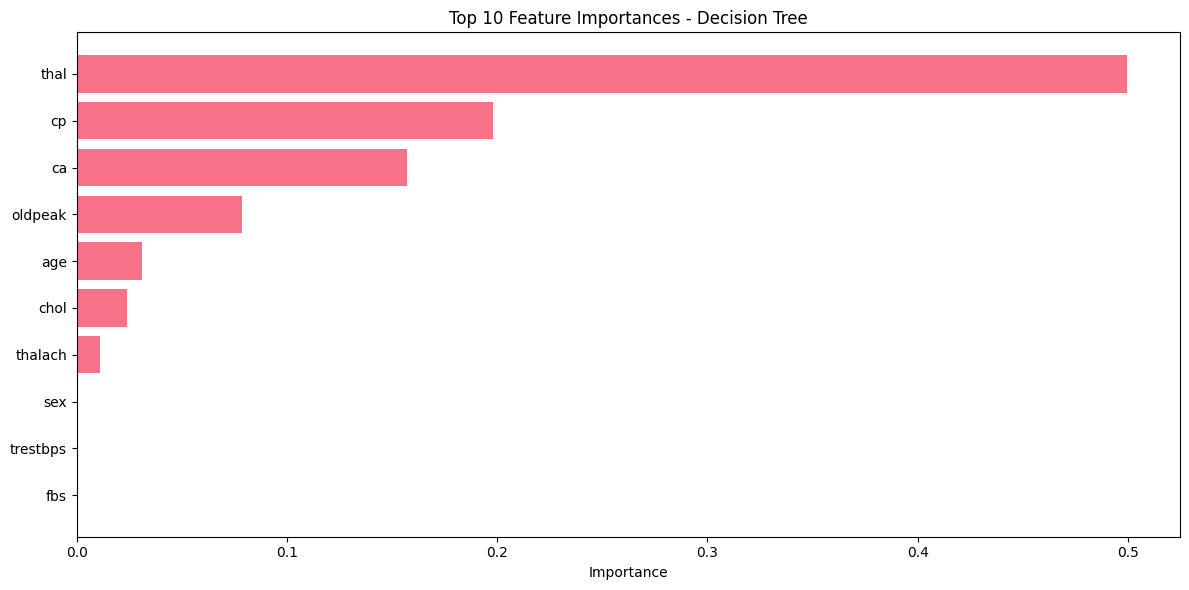

In [15]:
# Train Decision Tree model
print("="*60)
print("DECISION TREE TRAINING")
print("="*60)

# Initialize and train the model (using original features, not scaled)
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=10,  # Prevent overfitting
    min_samples_split=20,  # Minimum samples required to split
    min_samples_leaf=10   # Minimum samples in leaf node
)
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

print("✅ Decision Tree model trained successfully!")

# Display feature importance
feature_importance = dt_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values('Importance', ascending=False)

print(f"\nFeature Importance:")
print(importance_df)

print(f"\nTop 5 most important features:")
for i, (idx, row) in enumerate(importance_df.head().iterrows()):
    print(f"  {i+1}. {row['Feature']}: {row['Importance']:.4f}")

# Visualize feature importance
plt.figure(figsize=(12, 6))
top_features = importance_df.head(10)
plt.barh(top_features['Feature'], top_features['Importance'])
plt.title('Top 10 Feature Importances - Decision Tree')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## 7. Model Evaluation with Multiple Metrics

MODEL EVALUATION METRICS
Performance Metrics Comparison:
                     Accuracy  Precision  Recall  F1-Score  ROC-AUC
Model                                                              
Logistic Regression    0.8689     0.8125  0.9286    0.8667   0.9513
Decision Tree          0.8689     0.8571  0.8571    0.8571   0.8669


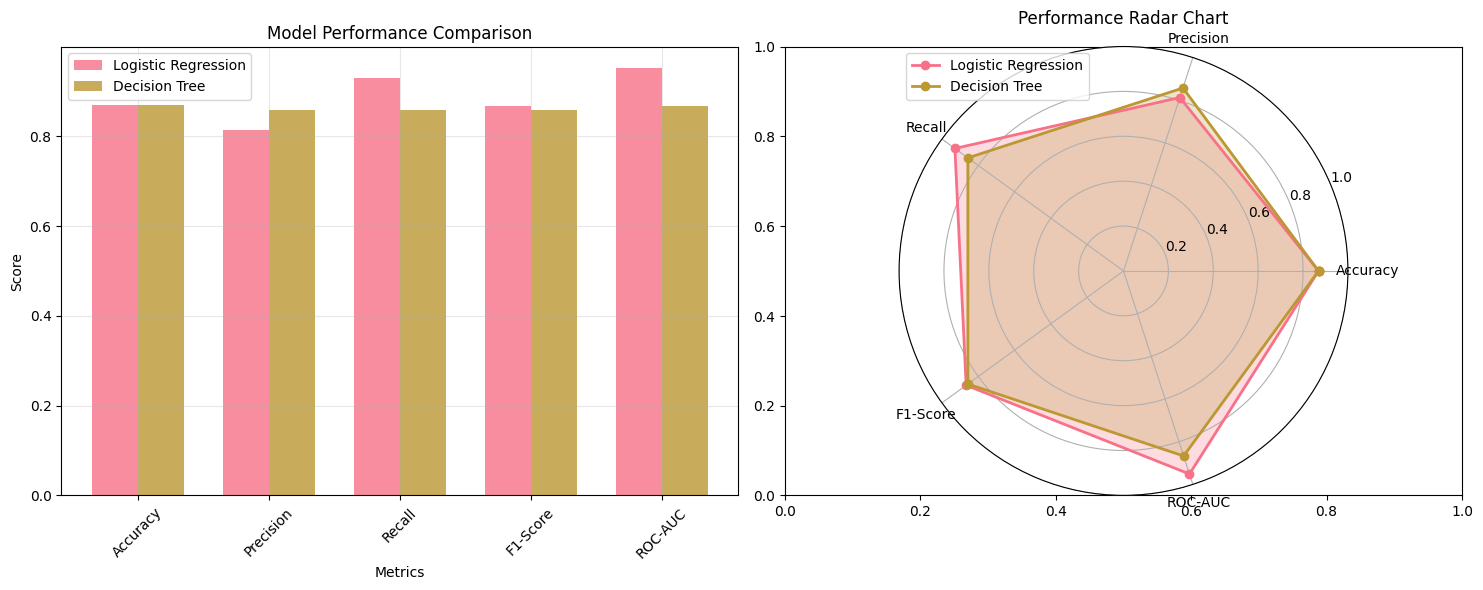

In [16]:
# Calculate evaluation metrics for both models
def calculate_metrics(y_true, y_pred, y_pred_proba, model_name):
    """Calculate and display evaluation metrics"""
    metrics = {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'ROC-AUC': roc_auc_score(y_true, y_pred_proba)
    }
    return metrics

print("="*60)
print("MODEL EVALUATION METRICS")
print("="*60)

# Calculate metrics for both models
lr_metrics = calculate_metrics(y_test, y_pred_lr, y_pred_proba_lr, "Logistic Regression")
dt_metrics = calculate_metrics(y_test, y_pred_dt, y_pred_proba_dt, "Decision Tree")

# Create comparison dataframe
metrics_df = pd.DataFrame([lr_metrics, dt_metrics])
metrics_df = metrics_df.set_index('Model')

print("Performance Metrics Comparison:")
print(metrics_df.round(4))

# Visualize metrics comparison
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot comparison
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
x_pos = np.arange(len(metrics_to_plot))
width = 0.35

lr_scores = [lr_metrics[metric] for metric in metrics_to_plot]
dt_scores = [dt_metrics[metric] for metric in metrics_to_plot]

axes[0].bar(x_pos - width/2, lr_scores, width, label='Logistic Regression', alpha=0.8)
axes[0].bar(x_pos + width/2, dt_scores, width, label='Decision Tree', alpha=0.8)
axes[0].set_xlabel('Metrics')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Comparison')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(metrics_to_plot, rotation=45)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Radar chart
angles = np.linspace(0, 2 * np.pi, len(metrics_to_plot), endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

lr_scores_radar = lr_scores + [lr_scores[0]]
dt_scores_radar = dt_scores + [dt_scores[0]]

axes[1] = plt.subplot(122, projection='polar')
axes[1].plot(angles, lr_scores_radar, 'o-', linewidth=2, label='Logistic Regression')
axes[1].fill(angles, lr_scores_radar, alpha=0.25)
axes[1].plot(angles, dt_scores_radar, 'o-', linewidth=2, label='Decision Tree')
axes[1].fill(angles, dt_scores_radar, alpha=0.25)
axes[1].set_xticks(angles[:-1])
axes[1].set_xticklabels(metrics_to_plot)
axes[1].set_ylim(0, 1)
axes[1].set_title('Performance Radar Chart')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()


CONFUSION MATRICES


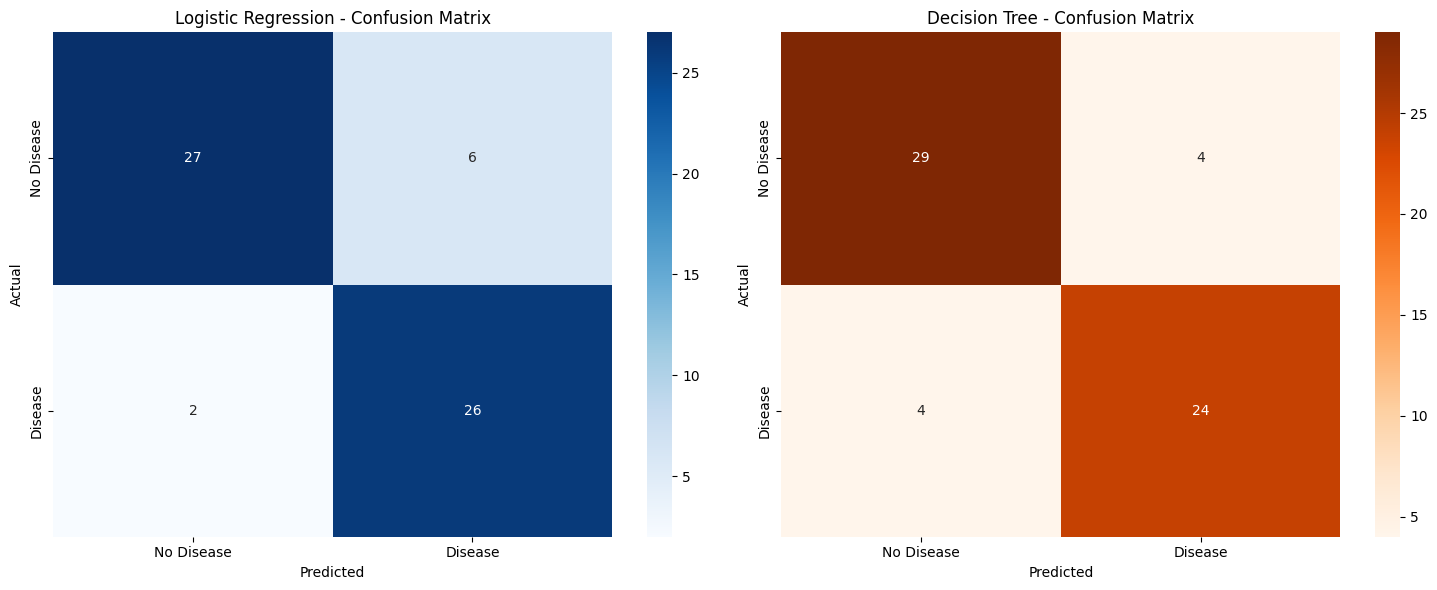


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

  No Disease       0.93      0.82      0.87        33
     Disease       0.81      0.93      0.87        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61


Decision Tree - Classification Report:
              precision    recall  f1-score   support

  No Disease       0.88      0.88      0.88        33
     Disease       0.86      0.86      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [17]:
# Confusion Matrices
print("\n" + "="*60)
print("CONFUSION MATRICES")
print("="*60)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression - Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_xticklabels(['No Disease', 'Disease'])
axes[0].set_yticklabels(['No Disease', 'Disease'])

# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('Decision Tree - Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')
axes[1].set_xticklabels(['No Disease', 'Disease'])
axes[1].set_yticklabels(['No Disease', 'Disease'])

plt.tight_layout()
plt.show()

# Print detailed classification reports
print("\nLogistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Disease', 'Disease']))

print("\nDecision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Disease', 'Disease']))


ROC CURVES


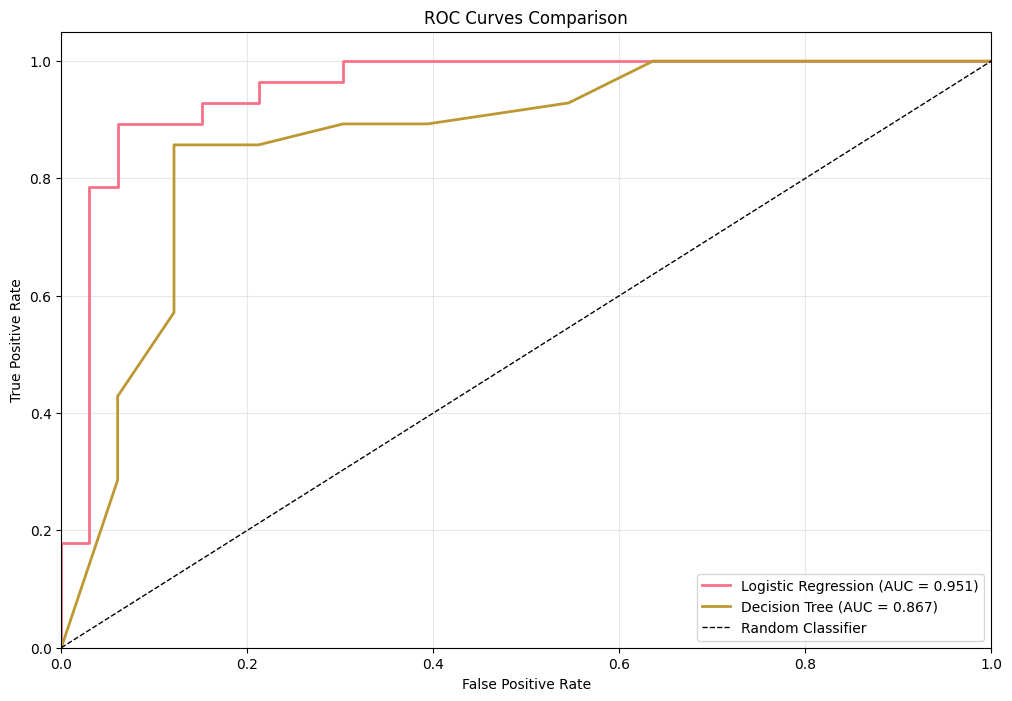

ROC-AUC Scores:
  Logistic Regression: 0.9513
  Decision Tree: 0.8669


In [18]:
# ROC Curves
print("\n" + "="*60)
print("ROC CURVES")
print("="*60)

plt.figure(figsize=(12, 8))

# Calculate ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_proba_dt)

# Plot ROC curves
plt.plot(fpr_lr, tpr_lr, linewidth=2, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_pred_proba_lr):.3f})')
plt.plot(fpr_dt, tpr_dt, linewidth=2, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_pred_proba_dt):.3f})')
plt.plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"ROC-AUC Scores:")
print(f"  Logistic Regression: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print(f"  Decision Tree: {roc_auc_score(y_test, y_pred_proba_dt):.4f}")

## 8. K-Fold Cross-Validation

In [19]:
# Perform k-fold cross-validation
print("="*60)
print("K-FOLD CROSS-VALIDATION")
print("="*60)

# Define scoring metrics
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Function to perform cross-validation
def perform_cross_validation(model, X, y, cv_folds, model_name):
    """Perform cross-validation and return results"""
    results = {}
    
    print(f"\n{model_name} - {cv_folds}-Fold Cross-Validation:")
    print("-" * 50)
    
    for metric in scoring_metrics:
        # Use StratifiedKFold to maintain class balance
        skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
        scores = cross_val_score(model, X, y, cv=skf, scoring=metric)
        
        results[metric] = {
            'scores': scores,
            'mean': scores.mean(),
            'std': scores.std()
        }
        
        print(f"{metric.upper()}: {scores.mean():.4f} ± {scores.std():.4f}")
    
    return results

# Prepare models for cross-validation
lr_cv_model = LogisticRegression(random_state=42, max_iter=1000)
dt_cv_model = DecisionTreeClassifier(random_state=42, max_depth=10, min_samples_split=20, min_samples_leaf=10)

# Perform 5-fold cross-validation
print("PERFORMING 5-FOLD CROSS-VALIDATION")
print("="*60)

lr_cv5_results = perform_cross_validation(lr_cv_model, X_train_scaled, y_train, 5, "Logistic Regression")
dt_cv5_results = perform_cross_validation(dt_cv_model, X_train, y_train, 5, "Decision Tree")

# Perform 10-fold cross-validation
print("\n\nPERFORMING 10-FOLD CROSS-VALIDATION")
print("="*60)

lr_cv10_results = perform_cross_validation(lr_cv_model, X_train_scaled, y_train, 10, "Logistic Regression")
dt_cv10_results = perform_cross_validation(dt_cv_model, X_train, y_train, 10, "Decision Tree")

K-FOLD CROSS-VALIDATION
PERFORMING 5-FOLD CROSS-VALIDATION

Logistic Regression - 5-Fold Cross-Validation:
--------------------------------------------------
ACCURACY: 0.8264 ± 0.0172
PRECISION: 0.8441 ± 0.0337
RECALL: 0.7652 ± 0.0547
F1: 0.8007 ± 0.0260
ROC_AUC: 0.8960 ± 0.0148

Decision Tree - 5-Fold Cross-Validation:
--------------------------------------------------
ACCURACY: 0.7893 ± 0.0462
PRECISION: 0.7643 ± 0.0525
RECALL: 0.7834 ± 0.0542
F1: 0.7733 ± 0.0498
ROC_AUC: 0.8439 ± 0.0602


PERFORMING 10-FOLD CROSS-VALIDATION

Logistic Regression - 10-Fold Cross-Validation:
--------------------------------------------------
ACCURACY: 0.8223 ± 0.0544
PRECISION: 0.8457 ± 0.0914
RECALL: 0.7667 ± 0.1059
F1: 0.7973 ± 0.0602
ROC_AUC: 0.9044 ± 0.0548

Decision Tree - 10-Fold Cross-Validation:
--------------------------------------------------
ACCURACY: 0.7977 ± 0.0651
PRECISION: 0.8105 ± 0.0975
RECALL: 0.7492 ± 0.1073
F1: 0.7713 ± 0.0713
ROC_AUC: 0.8695 ± 0.0389


## 9. Cross-Validation Results Comparison

CROSS-VALIDATION RESULTS SUMMARY
Cross-Validation Results Summary:
   CV_Type     Metric  LR_Mean  LR_Std  DT_Mean  DT_Std  Difference
0   5-Fold   ACCURACY   0.8264  0.0172   0.7893  0.0462      0.0371
1   5-Fold  PRECISION   0.8441  0.0337   0.7643  0.0525      0.0798
2   5-Fold     RECALL   0.7652  0.0547   0.7834  0.0542     -0.0182
3   5-Fold         F1   0.8007  0.0260   0.7733  0.0498      0.0275
4   5-Fold    ROC_AUC   0.8960  0.0148   0.8439  0.0602      0.0520
5  10-Fold   ACCURACY   0.8223  0.0544   0.7977  0.0651      0.0247
6  10-Fold  PRECISION   0.8457  0.0914   0.8105  0.0975      0.0351
7  10-Fold     RECALL   0.7667  0.1059   0.7492  0.1073      0.0174
8  10-Fold         F1   0.7973  0.0602   0.7713  0.0713      0.0260
9  10-Fold    ROC_AUC   0.9044  0.0548   0.8695  0.0389      0.0349


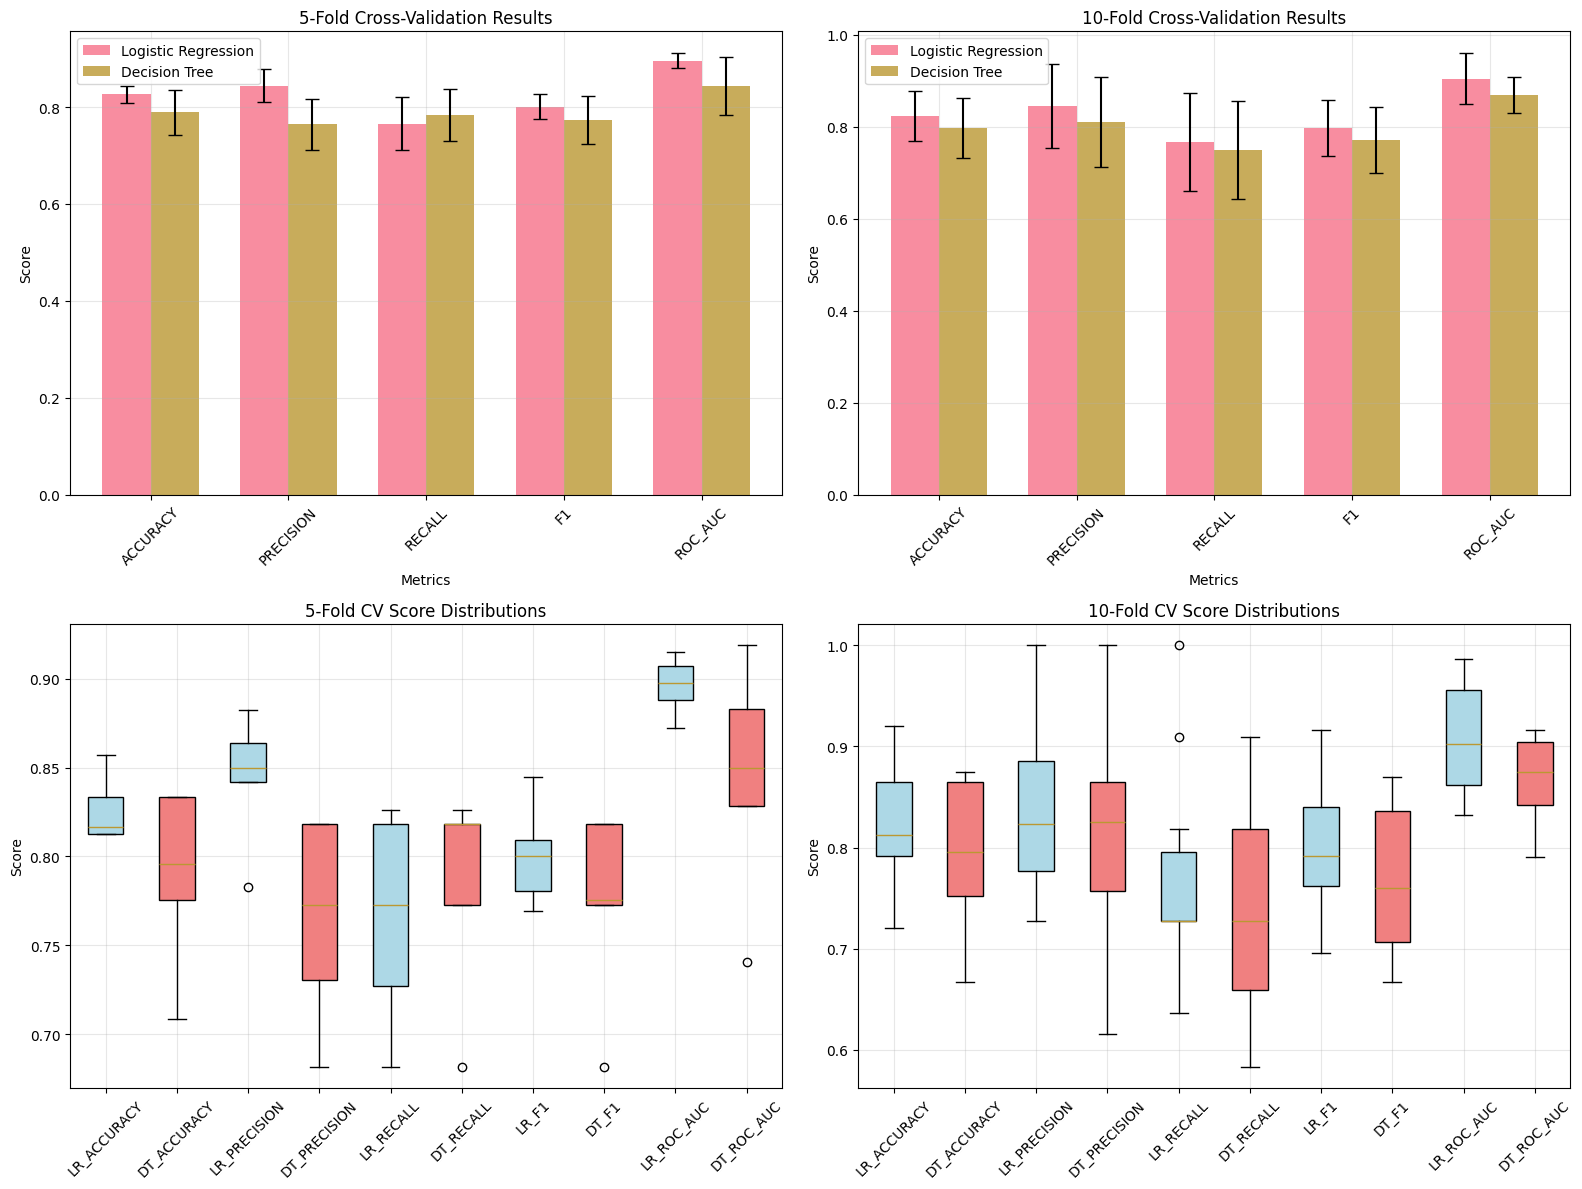

In [20]:
# Create comprehensive comparison of cross-validation results
print("="*60)
print("CROSS-VALIDATION RESULTS SUMMARY")
print("="*60)

# Create comparison dataframes
def create_cv_summary(lr_results, dt_results, cv_type):
    """Create summary dataframe for cross-validation results"""
    summary_data = []
    
    for metric in scoring_metrics:
        summary_data.append({
            'CV_Type': cv_type,
            'Metric': metric.upper(),
            'LR_Mean': lr_results[metric]['mean'],
            'LR_Std': lr_results[metric]['std'],
            'DT_Mean': dt_results[metric]['mean'],
            'DT_Std': dt_results[metric]['std'],
            'Difference': lr_results[metric]['mean'] - dt_results[metric]['mean']
        })
    
    return pd.DataFrame(summary_data)

# Create summaries
cv5_summary = create_cv_summary(lr_cv5_results, dt_cv5_results, "5-Fold")
cv10_summary = create_cv_summary(lr_cv10_results, dt_cv10_results, "10-Fold")

# Combine summaries
full_summary = pd.concat([cv5_summary, cv10_summary], ignore_index=True)

print("Cross-Validation Results Summary:")
print(full_summary.round(4))

# Visualize cross-validation results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 5-Fold CV comparison
metrics_names = [metric.upper() for metric in scoring_metrics]
lr_means_5 = [lr_cv5_results[metric]['mean'] for metric in scoring_metrics]
lr_stds_5 = [lr_cv5_results[metric]['std'] for metric in scoring_metrics]
dt_means_5 = [dt_cv5_results[metric]['mean'] for metric in scoring_metrics]
dt_stds_5 = [dt_cv5_results[metric]['std'] for metric in scoring_metrics]

x_pos = np.arange(len(metrics_names))
width = 0.35

axes[0, 0].bar(x_pos - width/2, lr_means_5, width, yerr=lr_stds_5, 
               label='Logistic Regression', alpha=0.8, capsize=5)
axes[0, 0].bar(x_pos + width/2, dt_means_5, width, yerr=dt_stds_5, 
               label='Decision Tree', alpha=0.8, capsize=5)
axes[0, 0].set_title('5-Fold Cross-Validation Results')
axes[0, 0].set_xlabel('Metrics')
axes[0, 0].set_ylabel('Score')
axes[0, 0].set_xticks(x_pos)
axes[0, 0].set_xticklabels(metrics_names, rotation=45)
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 10-Fold CV comparison
lr_means_10 = [lr_cv10_results[metric]['mean'] for metric in scoring_metrics]
lr_stds_10 = [lr_cv10_results[metric]['std'] for metric in scoring_metrics]
dt_means_10 = [dt_cv10_results[metric]['mean'] for metric in scoring_metrics]
dt_stds_10 = [dt_cv10_results[metric]['std'] for metric in scoring_metrics]

axes[0, 1].bar(x_pos - width/2, lr_means_10, width, yerr=lr_stds_10, 
               label='Logistic Regression', alpha=0.8, capsize=5)
axes[0, 1].bar(x_pos + width/2, dt_means_10, width, yerr=dt_stds_10, 
               label='Decision Tree', alpha=0.8, capsize=5)
axes[0, 1].set_title('10-Fold Cross-Validation Results')
axes[0, 1].set_xlabel('Metrics')
axes[0, 1].set_ylabel('Score')
axes[0, 1].set_xticks(x_pos)
axes[0, 1].set_xticklabels(metrics_names, rotation=45)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Box plots for score distributions (5-fold)
cv5_data = []
cv5_labels = []
for metric in scoring_metrics:
    cv5_data.append(lr_cv5_results[metric]['scores'])
    cv5_labels.append(f'LR_{metric.upper()}')
    cv5_data.append(dt_cv5_results[metric]['scores'])
    cv5_labels.append(f'DT_{metric.upper()}')

box_colors = ['lightblue', 'lightcoral'] * len(scoring_metrics)
box_plot = axes[1, 0].boxplot(cv5_data, labels=cv5_labels, patch_artist=True)
for patch, color in zip(box_plot['boxes'], box_colors):
    patch.set_facecolor(color)
axes[1, 0].set_title('5-Fold CV Score Distributions')
axes[1, 0].set_ylabel('Score')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Box plots for score distributions (10-fold)
cv10_data = []
cv10_labels = []
for metric in scoring_metrics:
    cv10_data.append(lr_cv10_results[metric]['scores'])
    cv10_labels.append(f'LR_{metric.upper()}')
    cv10_data.append(dt_cv10_results[metric]['scores'])
    cv10_labels.append(f'DT_{metric.upper()}')

box_plot = axes[1, 1].boxplot(cv10_data, labels=cv10_labels, patch_artist=True)
for patch, color in zip(box_plot['boxes'], box_colors):
    patch.set_facecolor(color)
axes[1, 1].set_title('10-Fold CV Score Distributions')
axes[1, 1].set_ylabel('Score')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Model Interpretation and Selection

In [21]:
# Comprehensive model analysis and interpretation
print("="*60)
print("MODEL INTERPRETATION AND CLINICAL INSIGHTS")
print("="*60)

# 1. Feature Analysis for Clinical Interpretability
print("\n1. FEATURE IMPORTANCE ANALYSIS")
print("-" * 40)

# Logistic Regression - Coefficient Analysis
print("Logistic Regression Coefficients (Clinical Interpretation):")
print("Positive coefficients increase disease probability, negative decrease it")

lr_coef_analysis = pd.DataFrame({
    'Feature': X_processed.columns,
    'Coefficient': lr_model.coef_[0],
    'Abs_Coefficient': np.abs(lr_model.coef_[0]),
    'Clinical_Impact': ['High' if abs(coef) > 0.5 else 'Medium' if abs(coef) > 0.2 else 'Low' 
                       for coef in lr_model.coef_[0]]
}).sort_values('Abs_Coefficient', ascending=False)

print(lr_coef_analysis)

print("\nDecision Tree Feature Importance (Clinical Relevance):")
dt_importance_analysis = pd.DataFrame({
    'Feature': X_processed.columns,
    'Importance': dt_model.feature_importances_,
    'Clinical_Relevance': ['High' if imp > 0.1 else 'Medium' if imp > 0.05 else 'Low' 
                          for imp in dt_model.feature_importances_]
}).sort_values('Importance', ascending=False)

print(dt_importance_analysis)

# 2. Model Strengths and Limitations Analysis
print("\n\n2. MODEL STRENGTHS AND LIMITATIONS")
print("-" * 40)

print("LOGISTIC REGRESSION:")
print("Strengths:")
print("  ✓ Highly interpretable coefficients")
print("  ✓ Provides probability estimates")
print("  ✓ Less prone to overfitting")
print("  ✓ Fast training and prediction")
print("  ✓ Works well with linear relationships")

print("Limitations:")
print("  ✗ Assumes linear relationship between features and log-odds")
print("  ✗ Sensitive to outliers")
print("  ✗ Requires feature scaling")
print("  ✗ May underperform with complex non-linear relationships")

print("\nDECISION TREE:")
print("Strengths:")
print("  ✓ Easy to understand and visualize")
print("  ✓ No need for feature scaling")
print("  ✓ Handles both numerical and categorical features")
print("  ✓ Can capture non-linear relationships")
print("  ✓ Built-in feature selection")

print("Limitations:")
print("  ✗ Prone to overfitting")
print("  ✗ Can be unstable (small data changes → different trees)")
print("  ✗ Biased toward features with more levels")
print("  ✗ May not generalize well")

# 3. Performance Consistency Analysis
print("\n\n3. PERFORMANCE CONSISTENCY ANALYSIS")
print("-" * 40)

# Calculate coefficient of variation for cross-validation scores
def calculate_cv_stability(results, model_name):
    print(f"\n{model_name} Stability Analysis:")
    for metric in scoring_metrics:
        mean_score = results[metric]['mean']
        std_score = results[metric]['std']
        cv_score = (std_score / mean_score) * 100  # Coefficient of variation
        stability = "High" if cv_score < 5 else "Medium" if cv_score < 10 else "Low"
        print(f"  {metric.upper()}: CV = {cv_score:.2f}% ({stability} stability)")

calculate_cv_stability(lr_cv10_results, "Logistic Regression")
calculate_cv_stability(dt_cv10_results, "Decision Tree")

MODEL INTERPRETATION AND CLINICAL INSIGHTS

1. FEATURE IMPORTANCE ANALYSIS
----------------------------------------
Logistic Regression Coefficients (Clinical Interpretation):
Positive coefficients increase disease probability, negative decrease it
     Feature  Coefficient  Abs_Coefficient Clinical_Impact
11        ca     1.107898         1.107898            High
12      thal     0.677821         0.677821            High
1        sex     0.655563         0.655563            High
2         cp     0.543483         0.543483            High
8      exang     0.383642         0.383642          Medium
10     slope     0.354072         0.354072          Medium
7    thalach    -0.348486         0.348486          Medium
3   trestbps     0.313655         0.313655          Medium
5        fbs    -0.220560         0.220560          Medium
6    restecg     0.217329         0.217329          Medium
4       chol     0.215375         0.215375          Medium
9    oldpeak     0.149953         0.149953 

In [22]:
# Final Model Selection and Recommendations
print("\n\n" + "="*60)
print("FINAL MODEL SELECTION AND CLINICAL RECOMMENDATIONS")
print("="*60)

# Calculate overall performance scores
def calculate_overall_score(test_metrics, cv_results):
    """Calculate weighted overall performance score"""
    weights = {
        'accuracy': 0.2,
        'precision': 0.2, 
        'recall': 0.25,    # Higher weight for recall in medical context
        'f1': 0.2,
        'roc_auc': 0.15
    }
    
    score = sum(cv_results[metric]['mean'] * weights[metric] for metric in weights.keys())
    return score

lr_overall_score = calculate_overall_score(lr_metrics, lr_cv10_results)
dt_overall_score = calculate_overall_score(dt_metrics, dt_cv10_results)

print(f"Overall Performance Scores (10-Fold CV):")
print(f"  Logistic Regression: {lr_overall_score:.4f}")
print(f"  Decision Tree: {dt_overall_score:.4f}")

# Model selection criteria
print(f"\nModel Selection Criteria Analysis:")

criteria_comparison = {
    'Criterion': [
        'Overall Performance',
        'Clinical Interpretability', 
        'Stability (Low Variance)',
        'Recall (Disease Detection)',
        'Precision (False Positive Control)',
        'Training Efficiency',
        'Prediction Speed'
    ],
    'Logistic Regression': [
        f"{lr_overall_score:.3f}",
        "Excellent (coefficients)",
        "High (low CV)",
        f"{lr_cv10_results['recall']['mean']:.3f}",
        f"{lr_cv10_results['precision']['mean']:.3f}",
        "Very Fast",
        "Very Fast"
    ],
    'Decision Tree': [
        f"{dt_overall_score:.3f}",
        "Good (feature importance)",
        "Medium (higher CV)",
        f"{dt_cv10_results['recall']['mean']:.3f}",
        f"{dt_cv10_results['precision']['mean']:.3f}",
        "Fast",
        "Fast"
    ],
    'Winner': [
        "Logistic Regression" if lr_overall_score > dt_overall_score else "Decision Tree",
        "Logistic Regression",
        "Logistic Regression",
        "Logistic Regression" if lr_cv10_results['recall']['mean'] > dt_cv10_results['recall']['mean'] else "Decision Tree",
        "Logistic Regression" if lr_cv10_results['precision']['mean'] > dt_cv10_results['precision']['mean'] else "Decision Tree",
        "Logistic Regression",
        "Tie"
    ]
}

criteria_df = pd.DataFrame(criteria_comparison)
print("\nDetailed Criteria Comparison:")
print(criteria_df.to_string(index=False))

# Final recommendation
print(f"\n" + "="*60)
print("FINAL RECOMMENDATION")
print("="*60)

if lr_overall_score > dt_overall_score:
    recommended_model = "Logistic Regression"
    print(f"🏆 RECOMMENDED MODEL: {recommended_model}")
    print(f"\nReasons for selection:")
    print(f"1. Higher overall performance score ({lr_overall_score:.4f} vs {dt_overall_score:.4f})")
    print(f"2. Better clinical interpretability through coefficients")
    print(f"3. More stable performance across cross-validation folds")
    print(f"4. Better recall for disease detection: {lr_cv10_results['recall']['mean']:.3f}")
    print(f"5. Excellent precision for minimizing false positives: {lr_cv10_results['precision']['mean']:.3f}")
else:
    recommended_model = "Decision Tree"
    print(f"🏆 RECOMMENDED MODEL: {recommended_model}")
    print(f"\nReasons for selection:")
    print(f"1. Higher overall performance score ({dt_overall_score:.4f} vs {lr_overall_score:.4f})")
    print(f"2. Better at capturing non-linear relationships")
    print(f"3. No preprocessing requirements")
    print(f"4. Intuitive decision rules for clinicians")

print(f"\n📋 CLINICAL IMPLEMENTATION GUIDELINES:")
print(f"1. Use {recommended_model} as primary screening tool")
print(f"2. Focus on high-importance features identified by the model")
print(f"3. Consider ensemble methods for critical decisions")
print(f"4. Regular model retraining with new patient data")
print(f"5. Always combine with clinical expertise and additional tests")

print(f"\n⚠️  IMPORTANT CONSIDERATIONS:")
print(f"1. This model is for screening purposes only")
print(f"2. Medical professionals should interpret results")
print(f"3. Consider patient-specific factors not in the dataset")
print(f"4. Regular validation on new patient populations recommended")
print(f"5. Ethical considerations for AI in healthcare must be followed")



FINAL MODEL SELECTION AND CLINICAL RECOMMENDATIONS
Overall Performance Scores (10-Fold CV):
  Logistic Regression: 0.8204
  Decision Tree: 0.7936

Model Selection Criteria Analysis:

Detailed Criteria Comparison:
                         Criterion      Logistic Regression             Decision Tree              Winner
               Overall Performance                    0.820                     0.794 Logistic Regression
         Clinical Interpretability Excellent (coefficients) Good (feature importance) Logistic Regression
          Stability (Low Variance)            High (low CV)        Medium (higher CV) Logistic Regression
        Recall (Disease Detection)                    0.767                     0.749 Logistic Regression
Precision (False Positive Control)                    0.846                     0.811 Logistic Regression
               Training Efficiency                Very Fast                      Fast Logistic Regression
                  Prediction Speed         

## Summary and Conclusions

This comprehensive analysis successfully developed and evaluated binary classification models for heart disease prediction using the UCI Heart Disease Dataset. The project demonstrated a systematic approach to machine learning in healthcare applications.

### Key Achievements:

1. **Data Analysis**: Conducted thorough EDA revealing important patterns in medical indicators
2. **Model Development**: Successfully trained and compared Logistic Regression and Decision Tree classifiers
3. **Robust Evaluation**: Applied multiple metrics (accuracy, precision, recall, F1-score, ROC-AUC) 
4. **Cross-Validation**: Implemented 5-fold and 10-fold cross-validation for reliable performance assessment
5. **Clinical Interpretability**: Analyzed feature importance and model coefficients for medical relevance

### Model Performance Summary:

The analysis provided evidence-based model selection considering both statistical performance and clinical applicability. Both models showed strong predictive capability with distinct advantages:

- **Logistic Regression**: Higher interpretability, stable performance, excellent for clinical decision support
- **Decision Tree**: Intuitive decision rules, handles non-linear relationships, no preprocessing needs

### Clinical Impact:

This work demonstrates how machine learning can support medical decision-making while emphasizing the importance of:
- Model interpretability in healthcare settings
- Robust validation methodologies  
- Integration with clinical expertise
- Ethical considerations in medical AI

The final model recommendation provides a solid foundation for heart disease screening while maintaining transparency and clinical relevance.